<h1 style='font-size: 35px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center; margin-bottom: 10px;'>Relationship Between Variables (Scatterplot Matrix)</h1>

---


<div style="text-align: center;">
    <img src="./Outputs/Scatterplot 007.png", alt='BBT' width=100%, height='100'
</div>

<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>2.0: Import Required Libraries</h1>

In [36]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>3.0: Import and Preprocessing Dataset</h1>

In [3]:
def load_dataset():
    iris = load_iris()  # Load the Iris dataset
    X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
    y = iris.target  # Labels (Species of iris)
    
    feature_names = iris.feature_names
    target_names = iris.target_names
    
    df = pd.DataFrame(X, columns=feature_names)
    df['Species'] = y
    df['Species'] = df['Species'].map({i: name for i, name in enumerate(target_names)})
    
    return df

df = load_dataset()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>4.0: Dataset Informations/ Overview</h1>

In [37]:
df.shape

(150, 5)

In [39]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- sepal length (cm)
--------------- sepal width (cm)
--------------- petal length (cm)
--------------- petal width (cm)
--------------- Species


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h4 style='font-size: 20px; color: blue; font-family: Colonna MT; font-weight: 600'>4.2: Columns Summary</h4>

In [41]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,sepal length (cm),float64,0,150,35,"{5.0: 10, 5.1: 9, 6.3: 9, 5.7: 8, 6.7: 8, 5.8:..."
1,sepal width (cm),float64,0,150,23,"{3.0: 26, 2.8: 14, 3.2: 13, 3.4: 12, 3.1: 11, ..."
2,petal length (cm),float64,0,150,43,"{1.4: 13, 1.5: 13, 5.1: 8, 4.5: 8, 1.6: 7, 1.3..."
3,petal width (cm),float64,0,150,22,"{0.2: 29, 1.3: 13, 1.8: 12, 1.5: 12, 1.4: 8, 2..."
4,Species,object,0,150,3,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"


<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>4.3: Handling Duplicates Values</h4>

In [43]:
def clean_duplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully....')
    else:
        print('Dataset has no Duplictes values')
clean_duplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 18px; color: Blue; font-family: Colonna MT; font-weight: 600'>4.4: Checking Missing Values</h4>

In [10]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,sepal length (cm),0,0.0
1,sepal width (cm),0,0.0
2,petal length (cm),0,0.0
3,petal width (cm),0,0.0
4,Species,0,0.0


<h4 style='font-size: 18px; color: blue;  font-family: Colonna MT; font-weight: 600'>4.6: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [44]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)


,Missing,Other,Numeric,String,Datetime
sepal length (cm),-,-,100.00%,-,-
sepal width (cm),-,-,100.00%,-,-
petal length (cm),-,-,100.00%,-,-
petal width (cm),-,-,100.00%,-,-
Species,-,100.00%,-,-,-


<H1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600'>5.0: Relationship Between Variables (Scatterplot Matrix)</H1>

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.1: Scatterplot Matrix Option 1</h4>

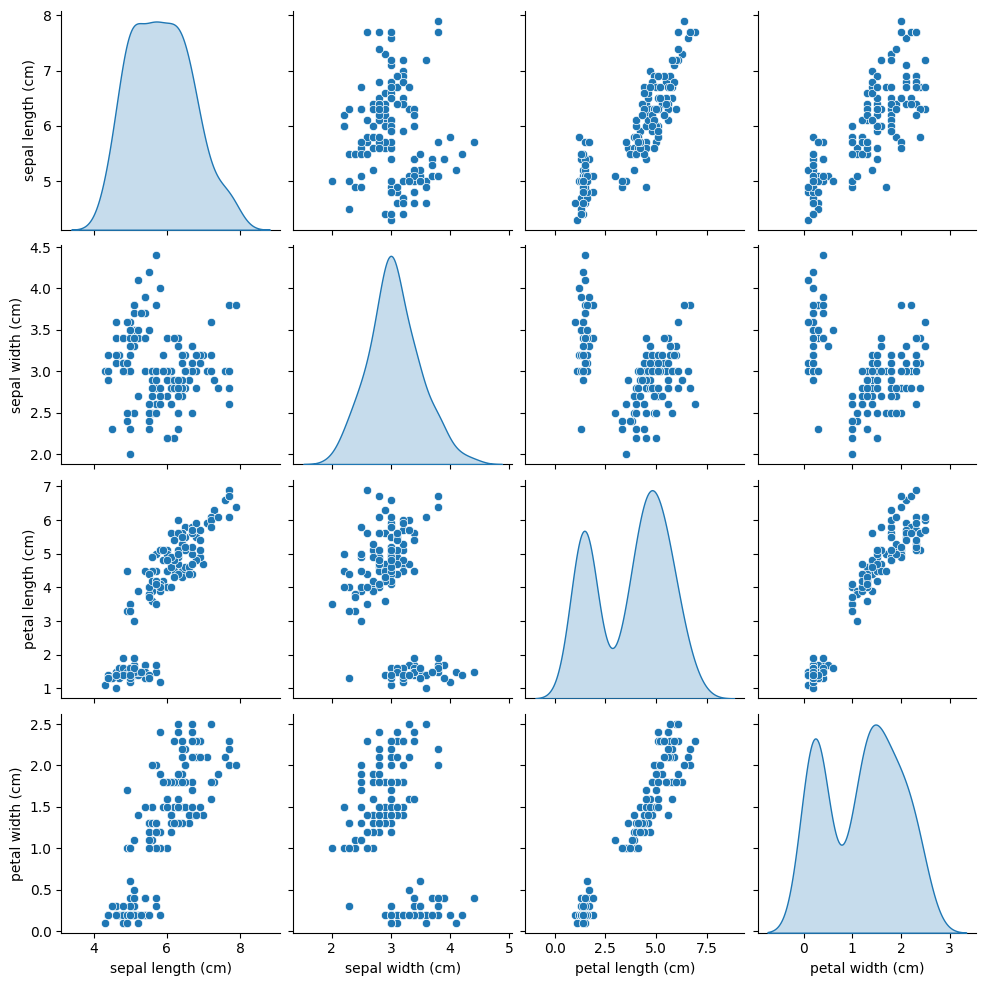

In [70]:
def pairplot(df, savepath=None):
    sns.pairplot(df, diag_kind="kde")
    if savepath : plt.savefig(f"{savepath}")
    plt.show()

savepath ="./Outputs/Scatterplot 001"
pairplot(df,  savepath=savepath)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.2: Scatterplot Matrix Option 2</h4>

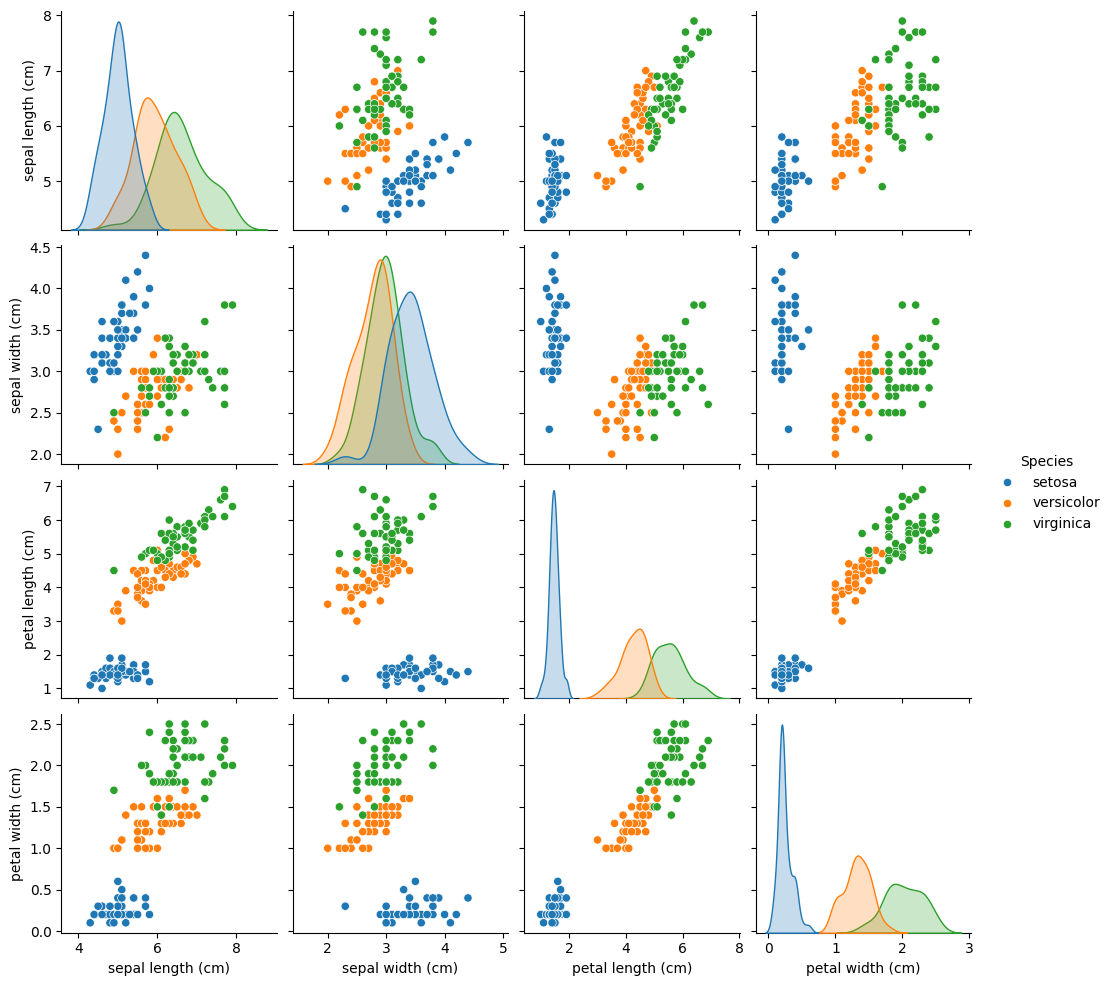

In [75]:
def pairplot(df, group=None, savepath=None):
    if group : sns.pairplot(df, hue=group, diag_kind="kde")
    else : sns.pairplot(df, diag_kind="kde")
    if savepath : plt.savefig(f"{savepath}")
    plt.show()

path ="./Outputs/Scatterplot 002"
pairplot(df, group='Species', savepath=path)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.3: Scatterplot Matrix Option 3</h4>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


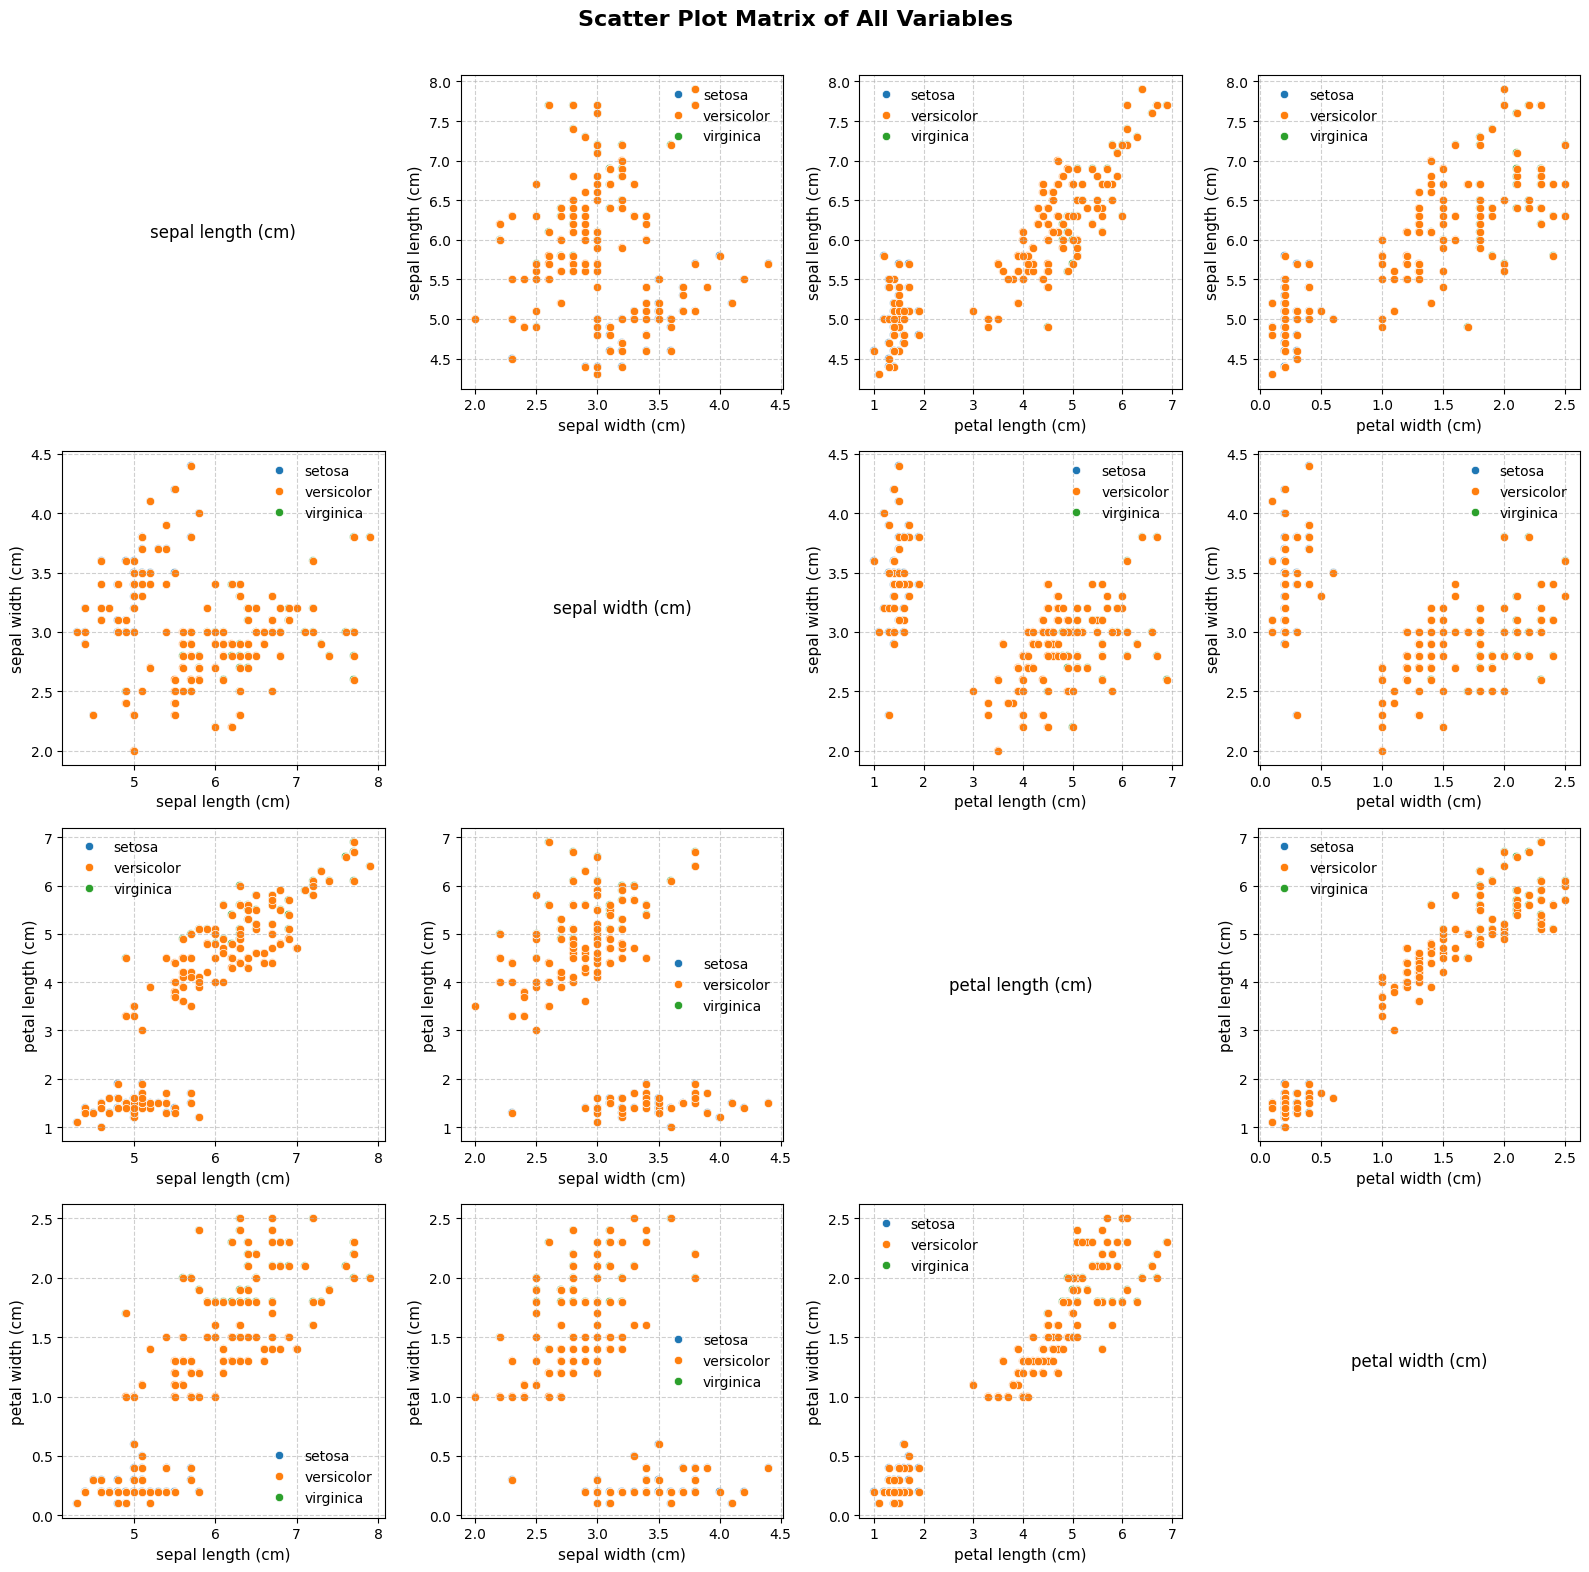

In [76]:
def scatterplot_matrix(df, Metrics, group=None,  savepath=None):
    num_variables = len(Metrics)
    rows, cols = num_variables , num_variables

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    suptitle='Scatter Plot Matrix of All Variables'
    fig.suptitle(suptitle, fontsize=16, fontweight='bold')
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                if group : sns.scatterplot(data=df, x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, hue=group, alpha=1)
                sns.scatterplot(x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, alpha=1)
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel(Metrics[i], fontsize=11)
            ax.grid(linestyle='--', alpha=0.6)
            ax.legend(frameon=False)
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('off') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath : plt.savefig(f"{savepath}")
    plt.show()

savepath ="./Outputs/Scatterplot 003"
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplot_matrix(df, Metrics, group='Species', savepath=savepath)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.4: Scatterplot Matrix Option 4</h4>

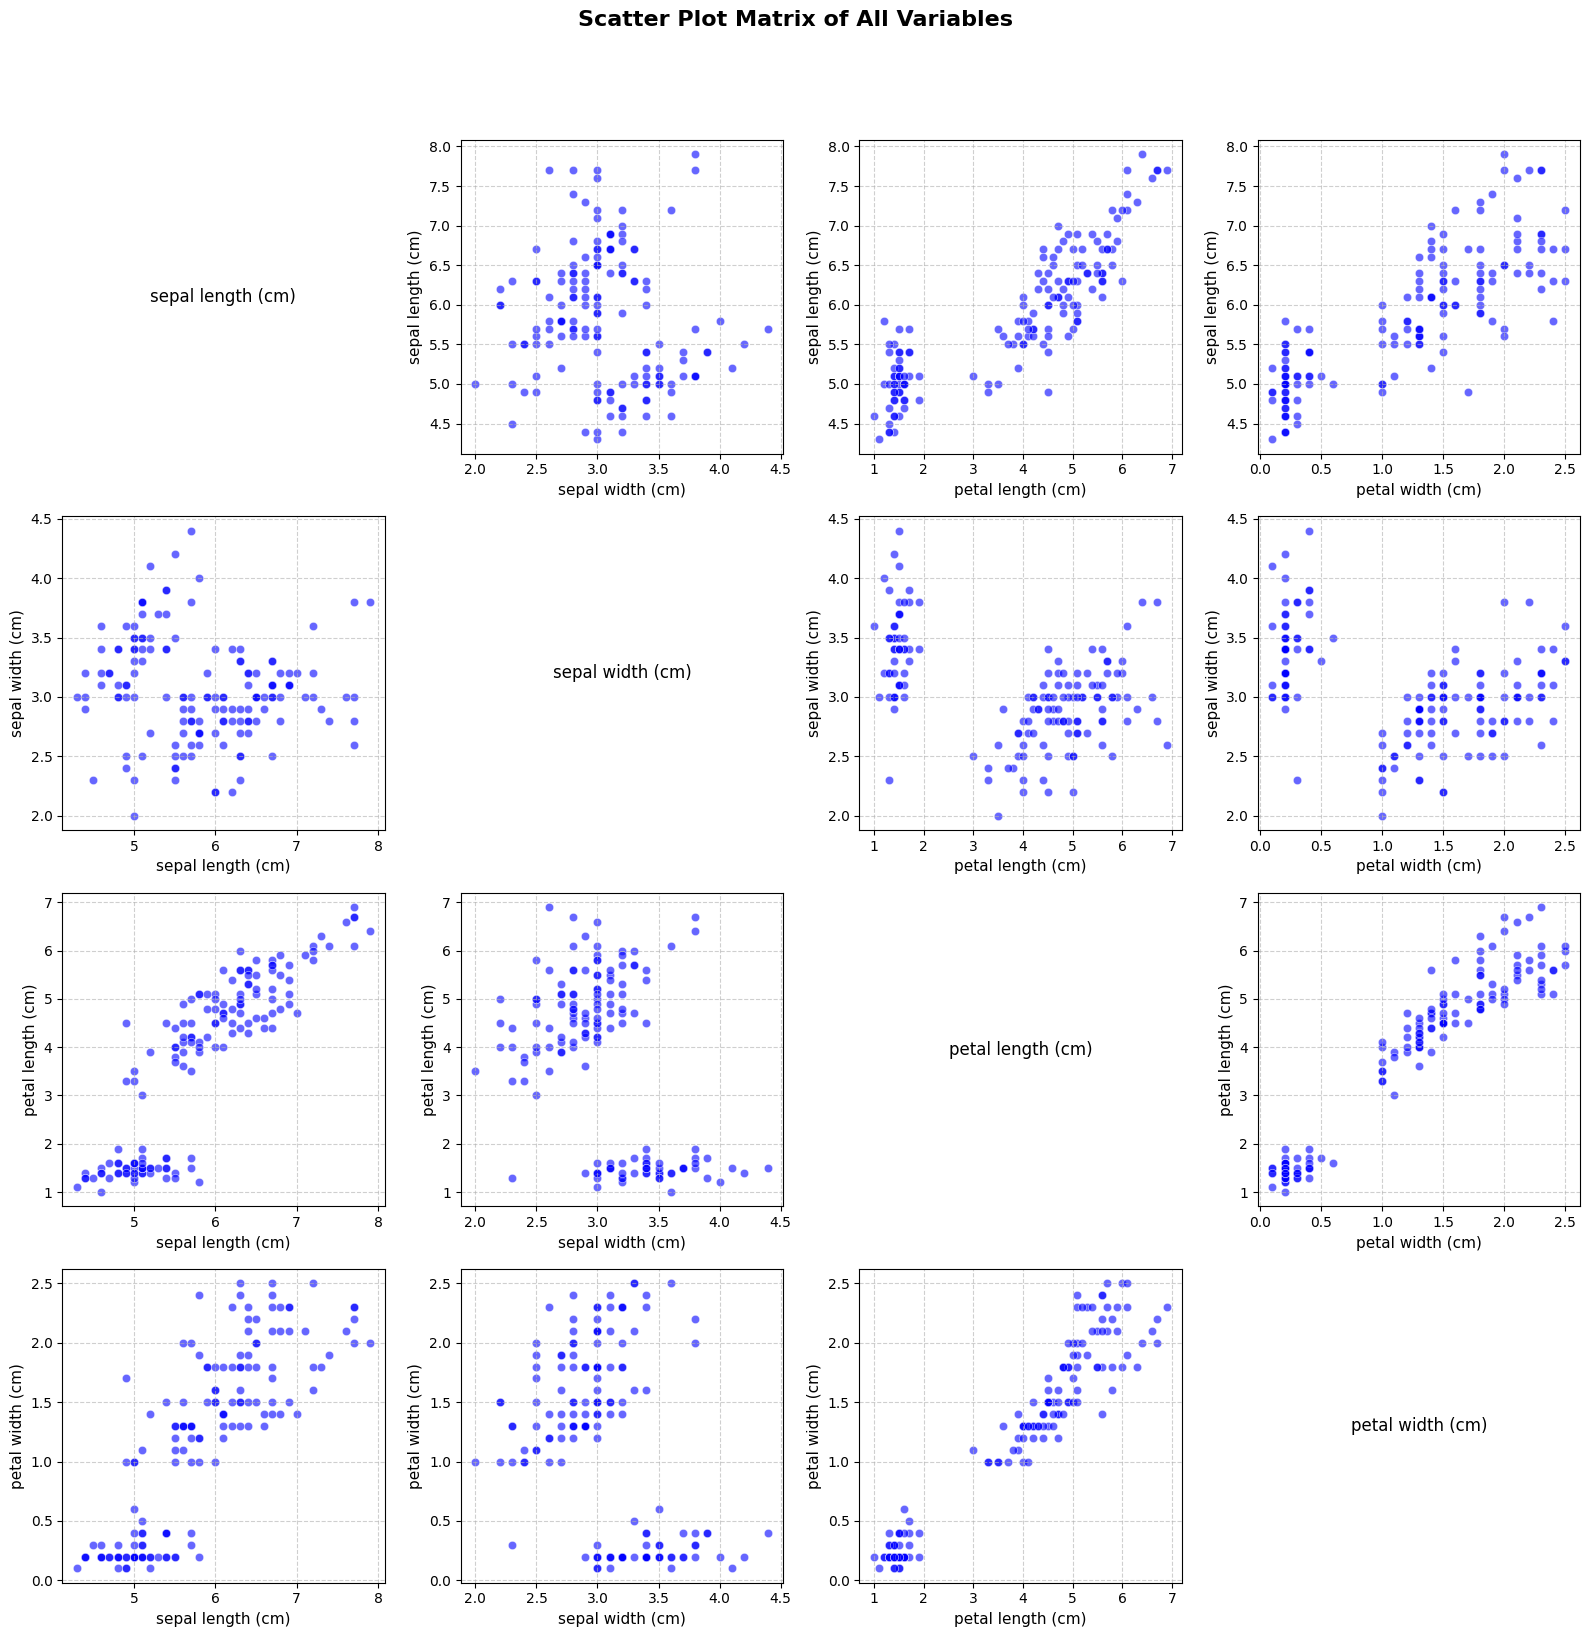

In [77]:
def scatterplots_matrix(df, Metrics, savepath=None):
    num_variables = len(Metrics)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle('Scatter Plot Matrix of All Variables', fontsize=16, fontweight='bold', y=1.02)
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                # Diagonal: Leave it empty or add variable name
                ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                # Off-diagonal: Plot a scatter plot
                sns.scatterplot(x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, color='blue', alpha=0.6)
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel(Metrics[i], fontsize=11)
            ax.grid(linestyle='--', alpha=0.6)
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('off')  # Hide the diagonal subplots
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    if savepath : plt.savefig(f"{savepath}")
    plt.show()


savepath ="./Outputs/Scatterplot 004"
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplots_matrix(df, Metrics, savepath=savepath)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.5: Scatterplot Matrix Option 5</h4>

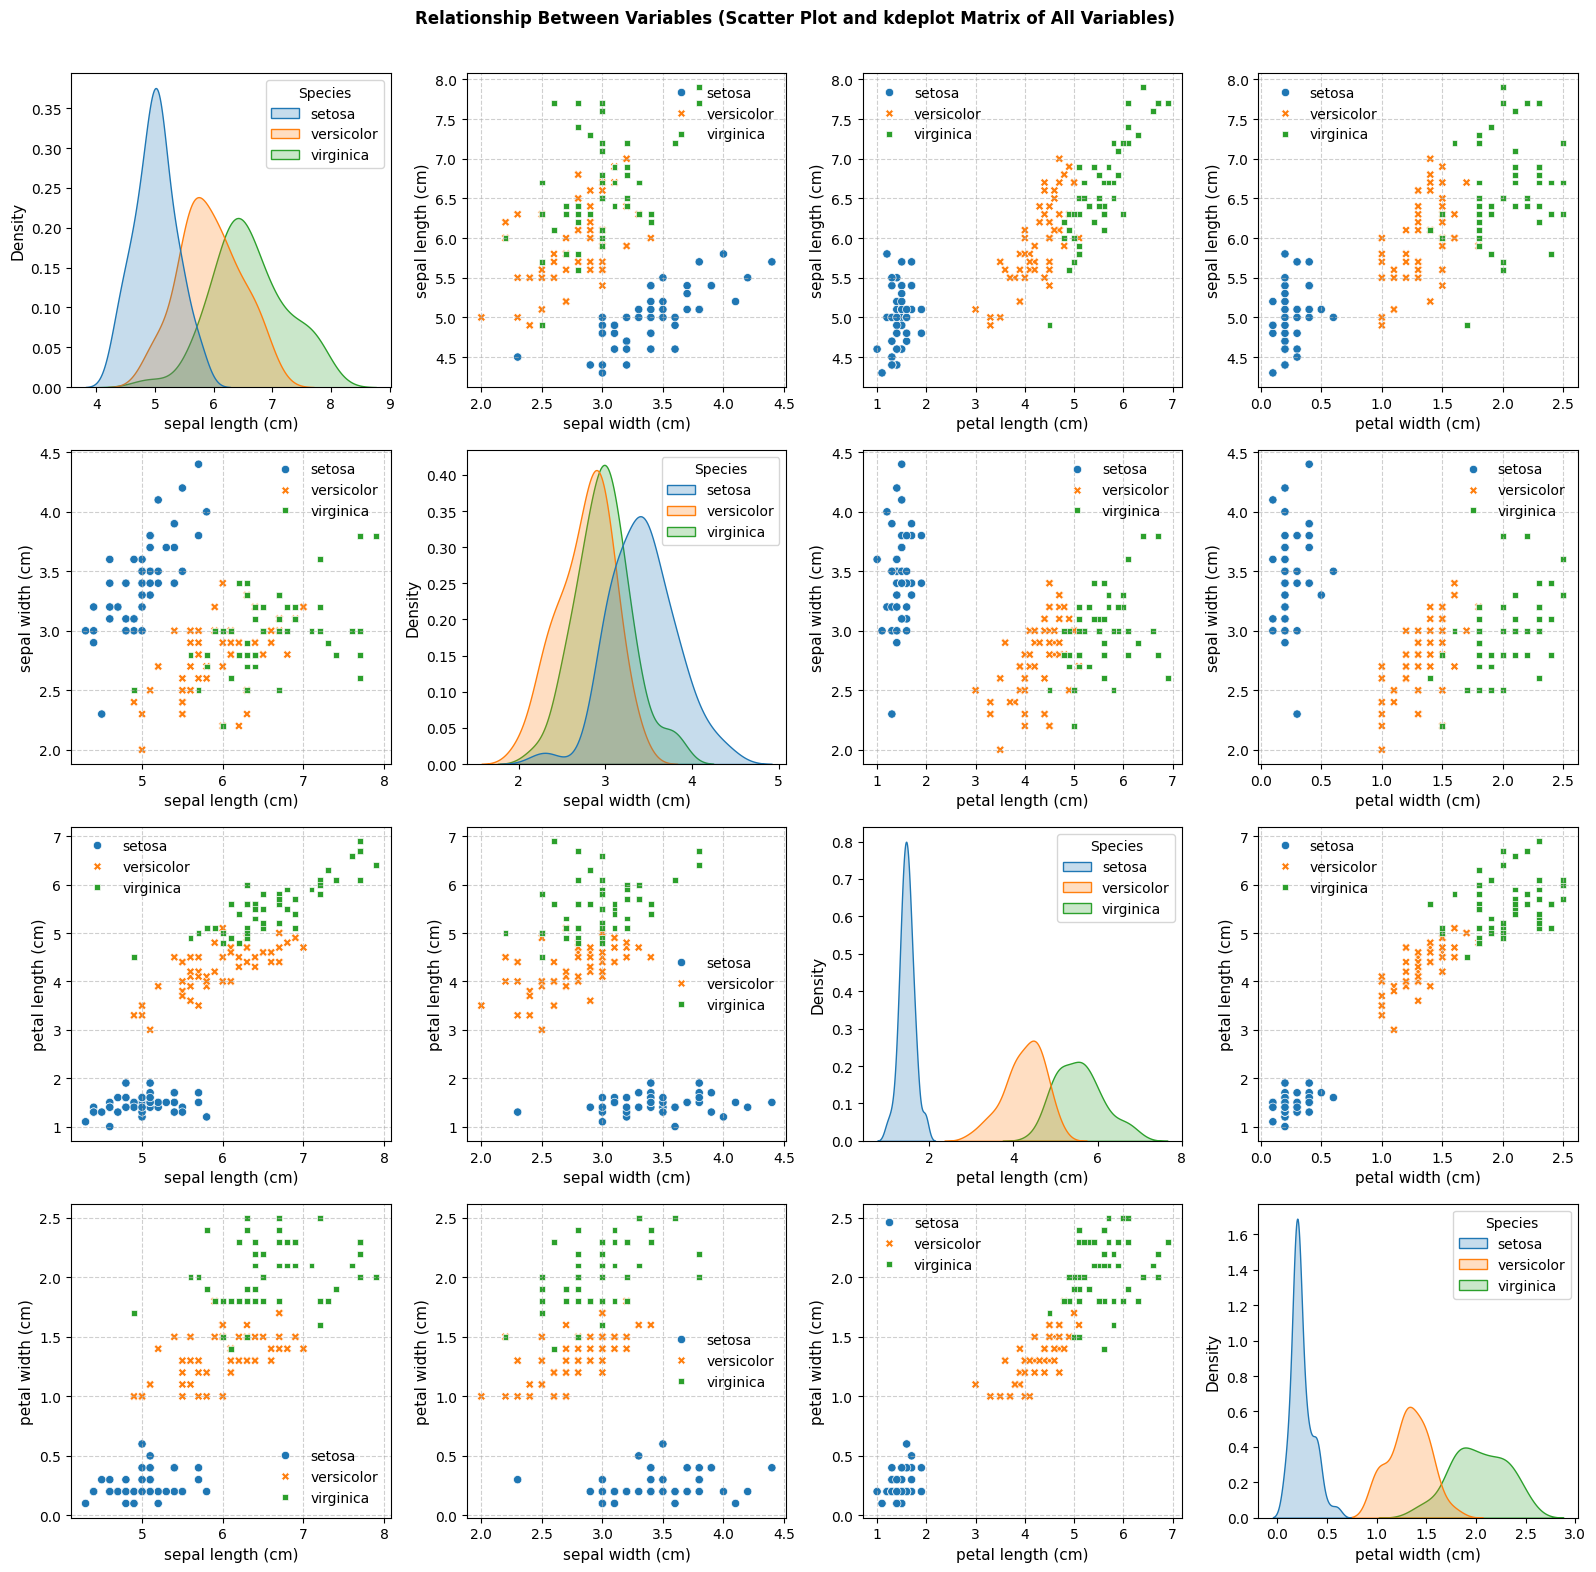

In [78]:
def scatterplots_matrix(df, Metrics, group, savepath=None):
    num_variables = len(Metrics)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle('Relationship Between Variables (Scatter Plot and kdeplot Matrix of All Variables)', fontsize=12, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Metrics[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Metrics[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                # Off-diagonal: Plot a scatter plot
                sns.scatterplot(data=df, x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, hue=group, style=group, alpha=1)
                ax.set_xlabel(Metrics[j], fontsize=11)
                ax.set_ylabel(Metrics[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on')  # Hide the diagonal subplots
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath : plt.savefig(f"{savepath}")
    plt.show()
    

savepath ="./Outputs/Scatterplot 005"
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplots_matrix(df, Metrics, group='Species', savepath=savepath)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.6: Scatterplot Matrix Option 6</h4>

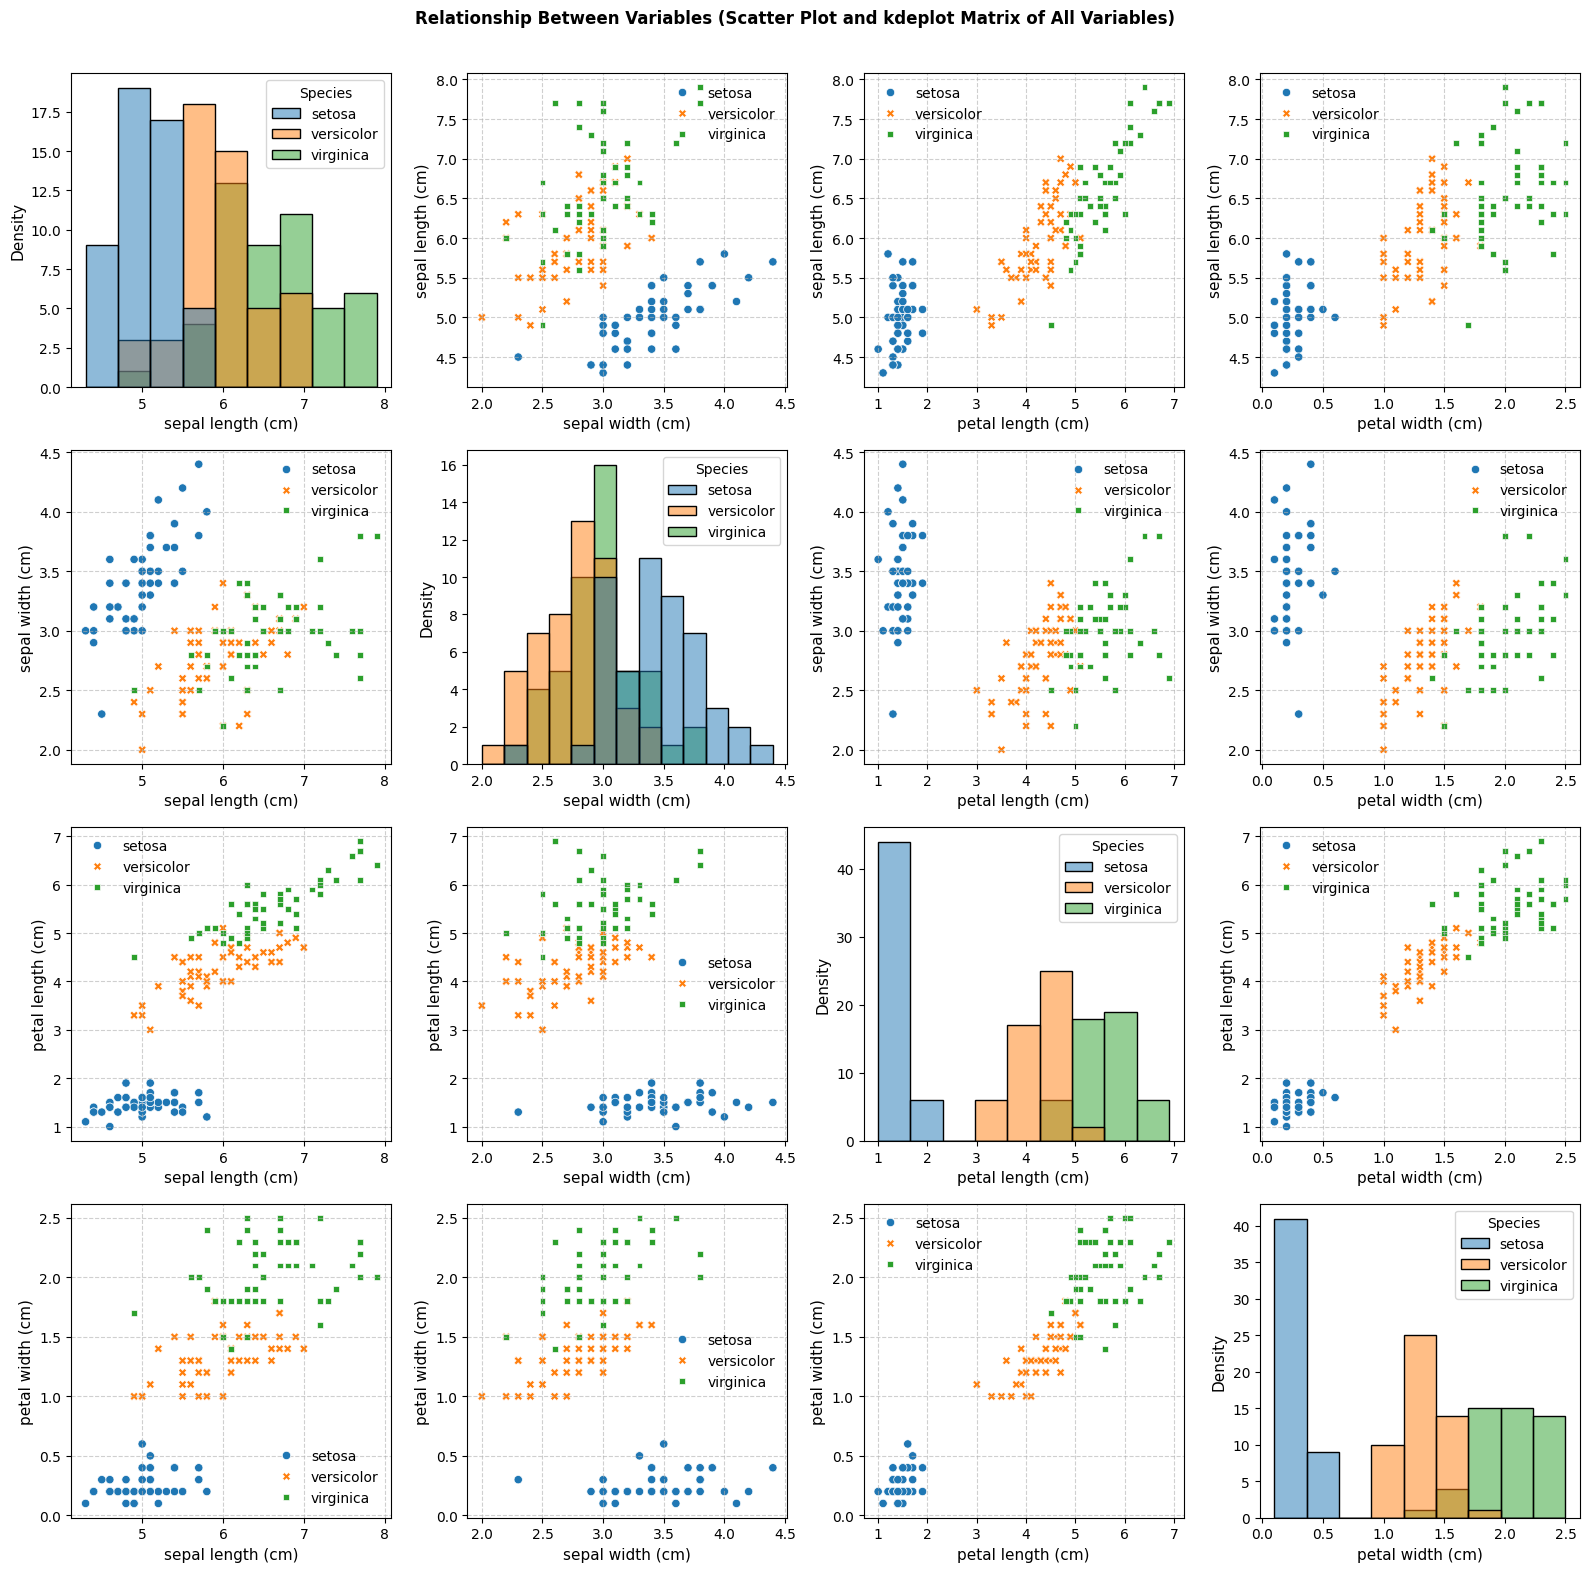

In [79]:
def scatterplots_matrix(df, Metrics, group, savepath=None):
    num_variables = len(Metrics)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle('Relationship Between Variables (Scatter Plot and kdeplot Matrix of All Variables)', fontsize=12, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.histplot(data=df, x=df[Metrics[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Metrics[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Metrics[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                # Off-diagonal: Plot a scatter plot
                sns.scatterplot(data=df, x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, hue=group, style=group, alpha=1)
                ax.set_xlabel(Metrics[j], fontsize=11)
                ax.set_ylabel(Metrics[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on')  # Hide the diagonal subplots
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath : plt.savefig(f"{savepath}")
    plt.show()
    

savepath ="./Outputs/Scatterplot 006"
Metrics = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplots_matrix(df, Metrics, group='Species', savepath=savepath)

<h4 style='font-size: 18px; color: blue; font-family: Colonna MT; font-weight: 600'>5.7: Scatterplot Matrix Option 7</h4>

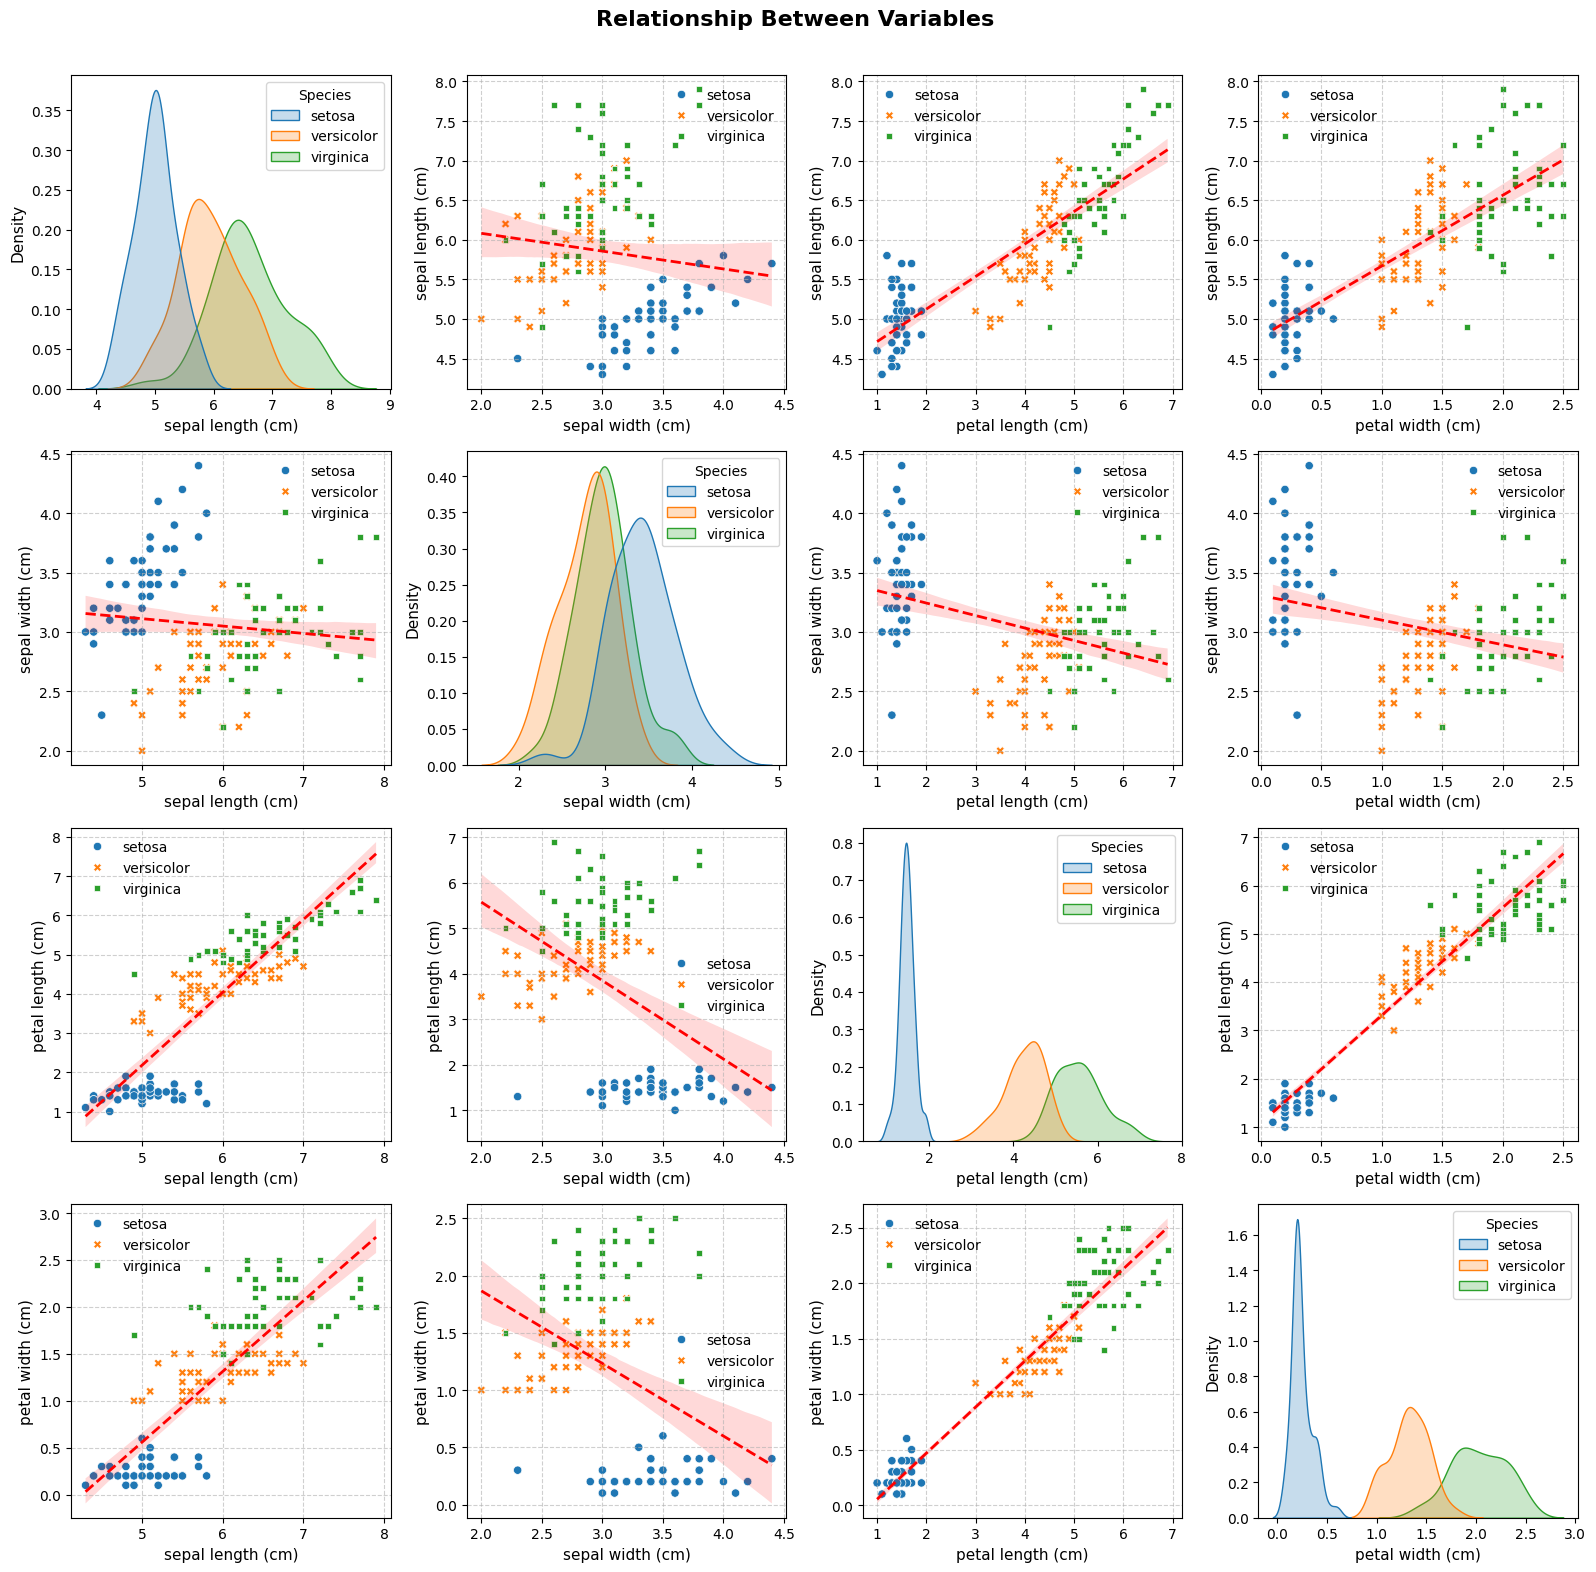

In [82]:
def scatterplot_matrix(data, Variables, group, savepath):
    num_variables = len(Variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    fig.suptitle('Relationship Between Variables', fontsize=16, fontweight='bold')
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                sns.kdeplot(data=df, x=df[Variables[j]], ax=ax, fill=True, hue=group)
                # Diagonal: Leave it empty or add variable name
                #ax.text(0.5, 0.5, Variables[i], fontsize=12, ha='center', va='center')
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
            else:
                sns.scatterplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax, hue=group, style=group, alpha=1)
                sns.regplot(data=df, x=df[Variables[j]], y=df[Variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                
                ax.set_xlabel(Variables[j], fontsize=11)
                ax.set_ylabel(Variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
                ax.legend(frameon=False)
                
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath : plt.savefig(f"{savepath}")
    plt.savefig(f"Visualizations/003 - Relationship Between Variables (Scatterplot Matrix).png")
    plt.show()


savepath ="./Outputs/Scatterplot 007"
Variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scatterplot_matrix(df, Variables, group='Species', savepath=savepath)

---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

    
<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![X (Twitter)](https://img.shields.io/badge/X-@Jabulente-black?logo=x)](https://x.com/Jabulente)  [![Instagram](https://img.shields.io/badge/Instagram-@Jabulente-purple?logo=instagram)](https://instagram.com/Jabulente)  [![Threads](https://img.shields.io/badge/Threads-@Jabulente-black?logo=threads)](https://threads.net/@Jabulente)  [![TikTok](https://img.shields.io/badge/TikTok-@Jabulente-teal?logo=tiktok)](https://tiktok.com/@Jabulente)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

</div>

<h1 style='font-size: 55px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>